In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='NanumGothicCoding')
sns.set(font='NanumGothicCoding')

In [123]:
rent_index = pd.read_csv("./data/(월) 월세가격지수_연립_다세대.csv")
rent_median = pd.read_csv("./data/(월) 중위월세가격_연립_다세대.csv")
rent_mean = pd.read_csv("./data/(월) 평균월세가격_연립_다세대.csv")
deposit_median = pd.read_csv("./data/(월) 중위월세보증금_연립_다세대.csv")
deposit_mean = pd.read_csv("./data/(월) 평균월세보증금_연립_다세대.csv")

# 1. 분석 주제 및 목적

---

- 지방 -> 경기권 -> 서울로 이사를 하며 지역 별로 집 값 차이가 심각하다는 생각이 들었음
- 지역 별로 집 값이 얼마나 큰 차이가 나는지 궁금했음
- 대한민국의 주요 도시의 연립형 다세대 주택의 월세와 보증금 통계를 조사하여 얼마나 큰 차이가 있는지 조사

# 2. 가설 설정

---

- 서울의 평균 연봉이 전국 평균에 비해 높은데 월세 차이는 연봉 차이의 약 30% 정도일 것이다
    - 일반적으로 월급에서 연봉이 차지하는 비율이 30% 정도가 적정하다고 하다
- 서울 내 연립/다세대 주택의 가격이 전국에서 가장 높을 것이고 서울에 가까운 순으로 상대적으로 높을 것이다
- 참고 사항: 전국 평균 연봉 3,830만원, 서울 평균 연봉 4,380만원

# 3. 데이터 출처

---

- **월세/보증금 통계**: [부동산통계정보](https://www.reb.or.kr/r-one/portal/main/indexPage.do)

# 4. 결과

---


### 전국 월세 중앙값 비교

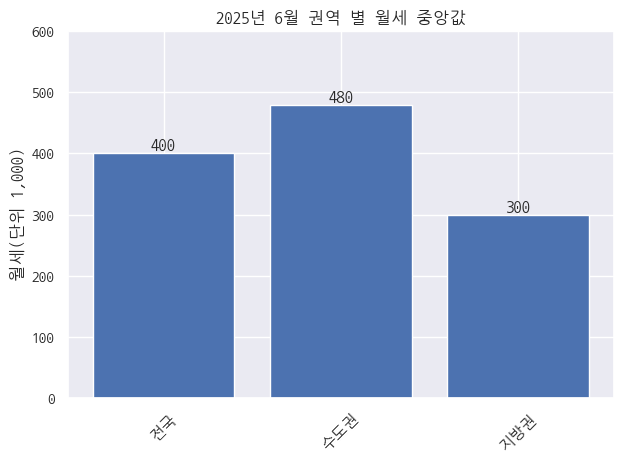

In [124]:
regions = ["전국", "수도권", "지방권"]
filtered = rent_median[rent_median['지역.2'].isin(regions)]
filtered = filtered.set_index('지역.2').loc[regions]
values = filtered['2025년 6월']

fig, ax = plt.subplots()
bar_container = ax.bar(regions, values)
ax.set(ylabel='월세(단위 1,000)', title='2025년 6월 권역 별 월세 중앙값', ylim=(0, 600))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 예상대로 수도권이 지방에 비해 훨씬 높은 중앙값을 형성한다
- 지방과 수도권의 월세 중앙값 차이가 20만원으로 연 240만원인데 평균 연봉은 500만원 정도 차이이므로 약 50%로 연봉차이를 감안해도 차이가 크다

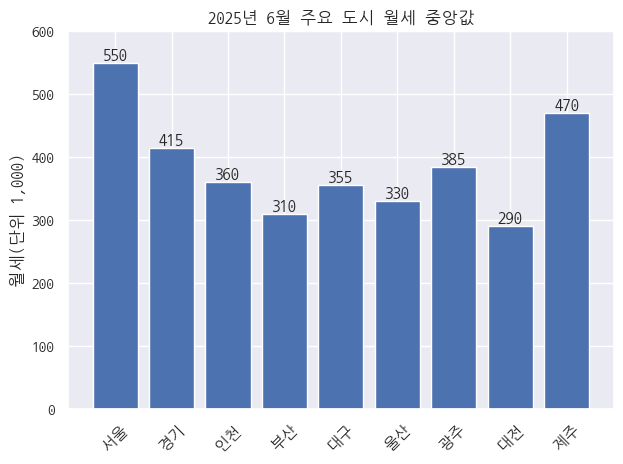

In [125]:
regions = ["서울", "경기", "인천", "부산", "대구", "울산", "광주", "대전", "제주"]
filtered = rent_median[rent_median['지역.2'].isin(regions)]
filtered = filtered.set_index('지역.2').loc[regions]
values = filtered['2025년 6월']

fig, ax = plt.subplots()
bar_container = ax.bar(regions, values)
ax.set(ylabel='월세(단위 1,000)', title='2025년 6월 주요 도시 월세 중앙값', ylim=(0, 600))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 도시 별로 보니 차이가 더욱 두드러진다
- 서울이 압도적으로 높고 경기도와의 차이가 꽤나 큰 모습을 보여준다.
- 인천이 생각보다 그리 높지 않다
    - 서울의 영향을 받는 것은 경기도권까지인 것 같다
- 예상외로 경기도보다 제주도가 더 높은 모습을 보여주는데 관광지 & 휴양지의 특성인 것 같다

### 전국 월세 평균 비교

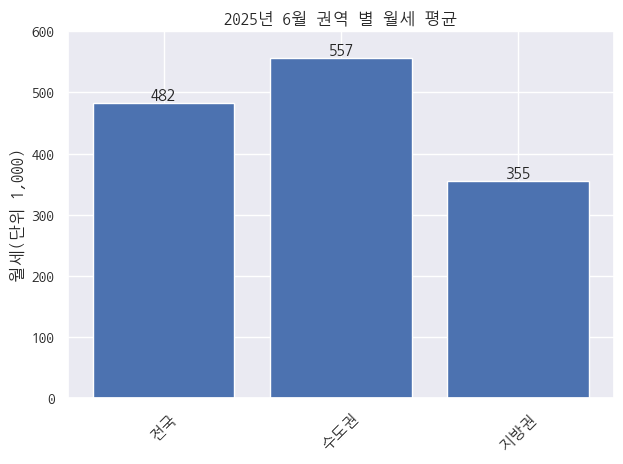

In [126]:
regions = ["전국", "수도권", "지방권"]
filtered = rent_mean[rent_mean['지역.2'].isin(regions)]
filtered = filtered.set_index('지역.2').loc[regions]
values = filtered['2025년 6월']

fig, ax = plt.subplots()
bar_container = ax.bar(regions, values)
ax.set(ylabel='월세(단위 1,000)', title='2025년 6월 권역 별 월세 평균', ylim=(0, 600))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 평균으로 보니 수도권과 지방권의 차이가 더욱 벌어짐
    - 18만원에서 20만원 차이로 크게 많이 벌어지지는 않음
- 집값이 특히 높은 지역이 서울에 몰려있기는 하지만 워낙 많은 매물이 있어서 영향을 덜 받은 것 같음

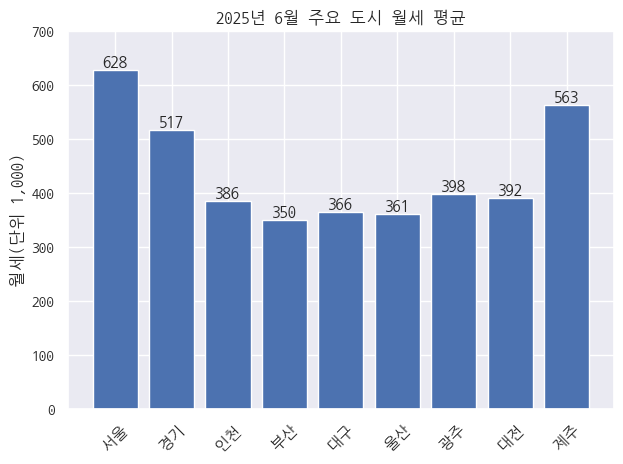

In [127]:
regions = ["서울", "경기", "인천", "부산", "대구", "울산", "광주", "대전", "제주"]
filtered = rent_mean[rent_mean['지역.2'].isin(regions)]
filtered = filtered.set_index('지역.2').loc[regions]
values = filtered['2025년 6월']

fig, ax = plt.subplots()
bar_container = ax.bar(regions, values)
ax.set(ylabel='월세(단위 1,000)', title='2025년 6월 주요 도시 월세 평균', ylim=(0, 700))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 여전히 서울이 1위이기는 하지만 예상처럼 매우 높은 평균을 보여주지는 않음
- 경기, 대전 제주는 중앙값과 평균의 차이가 매우 큼
- 관광도시이자 휴양지인 제주도 특성 상 일부 고급 주택이 평균을 높이는 것 같음
- 경기는 아마 서울 출퇴근이 용이한 지역과 그렇지 않은 지역의 차이가 클 것 같음

### 전국 보증금 중앙값 비교

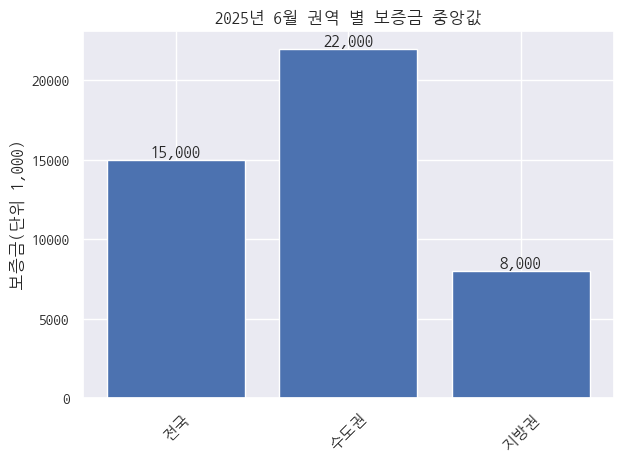

In [128]:
regions = ["전국", "수도권", "지방권"]
filtered = deposit_median[deposit_median['지역.2'].isin(regions)]
filtered = filtered.set_index('지역.2').loc[regions]
values = filtered['2025년 6월']

fig, ax = plt.subplots()
bar_container = ax.bar(regions, values)
ax.set(ylabel='보증금(단위 1,000)', title='2025년 6월 권역 별 보증금 중앙값')
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 권역 별로 보증금의 중앙값을 비교하니 월세와 비교해서 차이가 매우 큼
- 약 1.5배 차이였던 월세에 비해 보증금은 3배에 가까운 차이를 보임

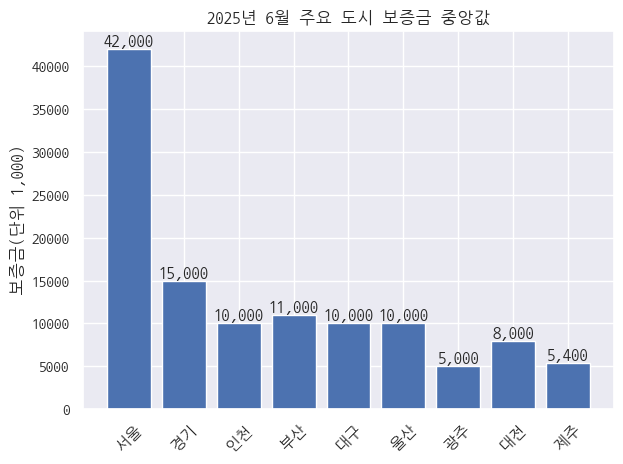

In [129]:
regions = ["서울", "경기", "인천", "부산", "대구", "울산", "광주", "대전", "제주"]
filtered = deposit_median[deposit_median['지역.2'].isin(regions)]
filtered = filtered.set_index('지역.2').loc[regions]
values = filtered['2025년 6월']

fig, ax = plt.subplots()
bar_container = ax.bar(regions, values)
ax.set(ylabel='보증금(단위 1,000)', title='2025년 6월 주요 도시 보증금 중앙값')
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 경기도와 다른 지역의 보증금 차이는 크지 않지만 서울은 다른 지역들에 비해 3~4배 차이를 보임
- 서울이 전국 평균에 비해 연봉이 높긴하지만 월세만을 올리기에는 한계가 있으니 보증금이 매우 높아지는 것 같음
- 단기간 휴양을 목적 거주가 많은 제주는 보증금이 월세에 비해 매우 낮은 편

### 전국 보증금 평균 비교

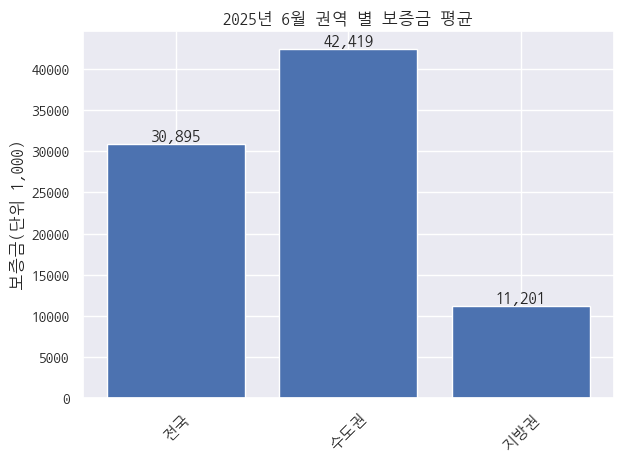

In [130]:
regions = ["전국", "수도권", "지방권"]
filtered = deposit_mean[deposit_mean['지역.2'].isin(regions)]
filtered = filtered.set_index('지역.2').loc[regions]
values = filtered['2025년 6월']

fig, ax = plt.subplots()
bar_container = ax.bar(regions, values)
ax.set(ylabel='보증금(단위 1,000)', title='2025년 6월 권역 별 보증금 평균')
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 보증금 평균 통계를 보면 차이가 더욱 심화됨
- 서울 지역의 일부 초고가 지역으로 인해 차이가 더욱 크게 벌어지는 것 같음

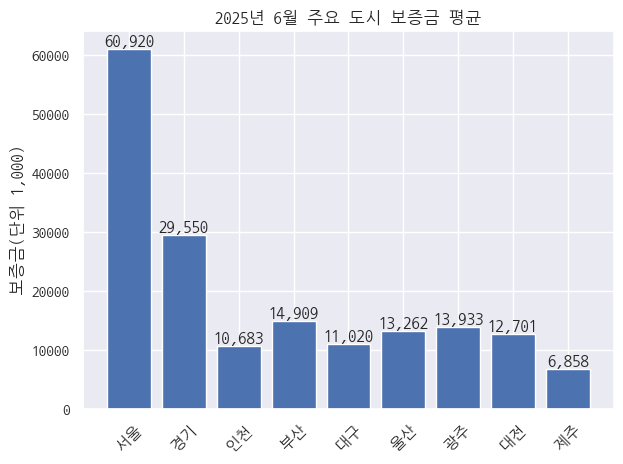

In [131]:
regions = ["서울", "경기", "인천", "부산", "대구", "울산", "광주", "대전", "제주"]
filtered = deposit_mean[deposit_mean['지역.2'].isin(regions)]
filtered = filtered.set_index('지역.2').loc[regions]
values = filtered['2025년 6월']

fig, ax = plt.subplots()
bar_container = ax.bar(regions, values)
ax.set(ylabel='보증금(단위 1,000)', title='2025년 6월 주요 도시 보증금 평균')
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 전국의 다른 지역은 중앙값과 평균의 차이가 그렇게까지 크지 않으나 서울과 경기는 약 1,500만원 이상의 차이가 존재
- 서울 경기 내 초고가 지역의 영향을 많이 받는 것 같음
- 경기도는 서울 출퇴근이 가능하거나 판교, 분당 등 일부 초고가 지역의 영향을 받은 것 같음

### 결론
- 수도권과 지방의 집 값 차이는 엄청나다
    - 월세에서도 월 평균 20만원 정도의 차이를 보이지만 보증금에서는 몇 천만원에 달하는 차이를 보여준다
    - 한정된 공간에 많은 사람들이 살다보니 공급이 수요를 따라가지 못해 가격이 말도 안 되게 올라가는 것 같다
- 월세를 올리는 것에는 한계가 있으니 보증금이 높아지는 것 같다
    - 서울이 비록 평균 연봉이 지방에 비해 높기는 하지만 압도적인 월세를 감당할 수준은 아님
    - 따라서 대출 등으로 해결 가능한 보증금이 높아진 것 같음
- 서울 집 값 너무 비싸다…
    - 월급 받은 거 다 어디로 갔지…
    - 숨만 쉬어도 돈이…